In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 2 days

    After the trial mode is expired, mkl will stop working.  If you want to
    use mkl thereafter, please purchase a license at http://continuum.io
    
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 2 days

    After the trial mode is expired, mkl will stop working.  If you want to
    use mkl thereafter, please purchase a license at http://continuum.io
    


In [2]:
import sys
import STORM

In [3]:
movie_size = 256
pixel_size = 0.156
bin_size = 0.02
r_max = 10
nonspec_clean = 0
nonspec = 0.25

## GRASP65-TGN46

In [4]:
mlist_grasp_tgn_clean = STORM.load_mlist('GRASP65-TGN46//movie_0002_list_xtalk_clean(300nm,110).txt')

In [5]:
mlist_grasp_tgn = STORM.load_mlist('GRASP65-TGN46//movie_0002_list.txt')

In [6]:
try:
    with load('PDD_GRASP65-TGN46.npz') as data:
        r_grasp_tgn = data['r']
        pdd_grasp_tgn = data['pdd']
except:
    r_grasp_tgn, pdd_grasp_tgn = STORM.pair_distance_distribution(mlist_grasp_tgn_clean, 1, mlist_grasp_tgn, 2, movie_size,
                                                                  pixel_size, bin_size, r_max, nonspec_clean, nonspec,
                                                                  n_threads=14, verbose=True)
    savez('PDD_GRASP65-TGN46', r=r_grasp_tgn, pdd=pdd_grasp_tgn)

Correlating 38775x574597 molecules.
Calculating distance histogram...
Calculating image B to non-specific distance histogram...


In [7]:
try:
    with load('PSDD_GRASP65-TGN46.npz') as data:
        r_grasp_tgn = data['r']
        psdd_grasp_tgn = data['psdd']
        pint_set_area = data['area']
except:
    r_grasp_tgn, psdd_grasp_tgn, area = STORM.point_set_distance_distribution(mlist_grasp_tgn_clean, 1, mlist_grasp_tgn, 2,
                                                                              movie_size, pixel_size, bin_size, r_max, nonspec,
                                                                              True)
    savez('PSDD_GRASP65-TGN46', r=r_grasp_tgn, psdd=psdd_grasp_tgn, area=area)

Generating pixel-based super-resolution images...
Calculating point-distribution for distance 500/501.


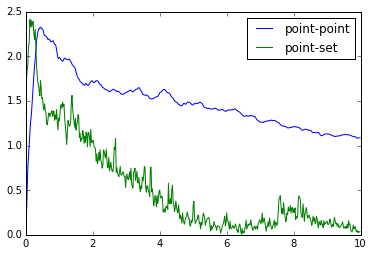

In [8]:
figure(figsize=(6,3*6/4))
plot(r_grasp_tgn, pdd_grasp_tgn, label='point-point')
plot(r_grasp_tgn, psdd_grasp_tgn, label='point-set')
ylim((0,2.5))
legend(loc='best')

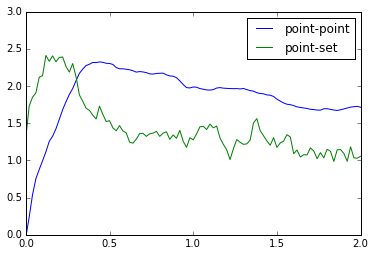

In [9]:
figure()
plot(r_grasp_tgn, pdd_grasp_tgn, label='point-point')
plot(r_grasp_tgn, psdd_grasp_tgn, label='point-set')
xlim((0,2))
ylim((0,3))
legend(loc='best')

## GRASP65-GM130

In [10]:
mlist_grasp_gm_clean = STORM.load_mlist('GRASP65-GM130//movie_0002_list_xtalk_clean(300nm,30).txt')

In [11]:
mlist_grasp_gm = STORM.load_mlist('GRASP65-GM130//movie_0002_list.txt')

In [12]:
try:
    with load('PDD_GRASP65-GM130.npz') as data:
        r_grasp_gm = data['r']
        pdd_grasp_gm = data['pdd']
except:
    r_grasp_gm, pdd_grasp_gm = STORM.pair_distance_distribution(mlist_grasp_gm_clean, 1, mlist_grasp_gm, 2, movie_size,
                                                                pixel_size, bin_size, r_max, nonspec_clean, nonspec,
                                                                n_threads=14, verbose=True)
    savez('PDD_GRASP65-GM130', r=r_grasp_gm, pdd=pdd_grasp_gm)

Correlating 10544x396408 molecules.
Calculating distance histogram...
Calculating image B to non-specific distance histogram...


In [13]:
try:
    with load('PSDD_GRASP65-GM130.npz') as data:
        r_grasp_gm = data['r']
        psdd_grasp_gm = data['psdd']
        pint_set_area = data['area']
except:
    r_grasp_gm, psdd_grasp_gm, area = STORM.point_set_distance_distribution(mlist_grasp_gm_clean, 1, mlist_grasp_gm, 2,
                                                                            movie_size, pixel_size, bin_size, r_max, nonspec,
                                                                            True)
    savez('PSDD_GRASP65-GM130', r=r_grasp_gm, psdd=psdd_grasp_gm, area=area)

Generating pixel-based super-resolution images...
Calculating point-distribution for distance 500/501.


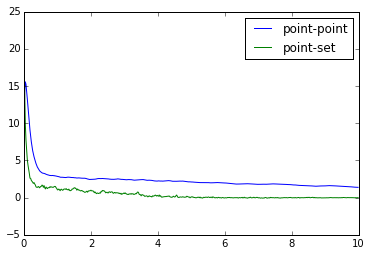

In [14]:
figure()
plot(r_grasp_gm, pdd_grasp_gm, label='point-point')
plot(r_grasp_gm, psdd_grasp_gm, label='point-set')
legend(loc='best')

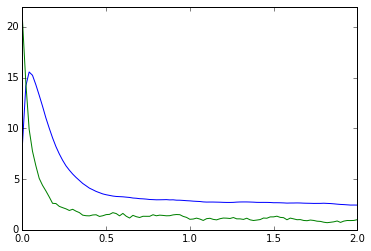

In [15]:
figure()
plot(r_grasp_gm, pdd_grasp_gm)
plot(r_grasp_gm, psdd_grasp_gm)
xlim((0,2))
ylim((0,22))
savefig('both_grasp_gm.svg', dpi=300)